In [42]:
!pip install pandas


In [43]:
import pandas as pd

In [44]:
file_path= r'F:\anaconda3\Obesity_prediction.csv'
df= pd.read_csv(file_path)
print(df.head())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe


Model F1 Score: 0.91


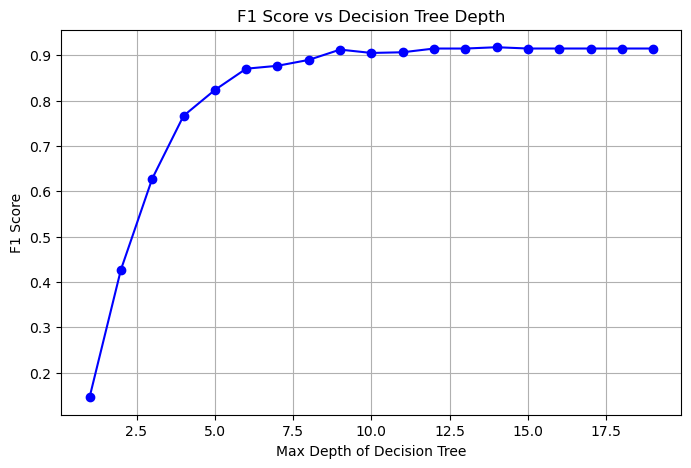


Model Accuracy: 91.54%


"Y_prob = clf.predict_proba(X_test)\n\n\nY_test_bin = label_binarize(Y_test, classes=list(range(len(set(Y)))))\n\n\nplt.figure(figsize=(8, 6))\ncolors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])  # Different colors for classes\n\nfor i, color in zip(range(Y_test_bin.shape[1]), colors):\n    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])\n    roc_auc = auc(fpr, tpr)\n    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')\n\n# Plot settings\nplt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate (FPR)')\nplt.ylabel('True Positive Rate (TPR)')\nplt.title('ROC Curve and AUC for Multi-Class Classification')\nplt.legend(loc='lower right')\nplt.show() "

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

dataset = pd.read_csv(r'F:\anaconda3\Obesity_prediction.csv')

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

label_encoder = LabelEncoder()
dataset['family_history'] = label_encoder.fit_transform(dataset['family_history'])

label_encoder = LabelEncoder()
dataset['FAVC'] = label_encoder.fit_transform(dataset['FAVC'])

label_encoder = LabelEncoder()
dataset['CAEC'] = label_encoder.fit_transform(dataset['CAEC'])

label_encoder = LabelEncoder()
dataset['SMOKE'] = label_encoder.fit_transform(dataset['SMOKE'])

label_encoder = LabelEncoder()
dataset['SCC'] = label_encoder.fit_transform(dataset['SCC'])

label_encoder = LabelEncoder()
dataset['CALC'] = label_encoder.fit_transform(dataset['CALC'])

label_encoder = LabelEncoder()
dataset['MTRANS'] = label_encoder.fit_transform(dataset['MTRANS'])

X = dataset.drop('Obesity', axis=1)
Y = dataset['Obesity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score

f1 = f1_score(Y_test, Y_pred, average='weighted')
print(f'\nModel F1 Score: {f1:.2f}')

import numpy as np
import matplotlib.pyplot as plt

depths = np.arange(1, 20)  # Try depths from 1 to 20
f1_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(depths, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Decision Tree Depth')
plt.grid(True)
plt.show()

accuracy = accuracy_score(Y_test, Y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')

'''class_names = [str(label) for label in Y.unique()]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)
plt.show()'''




'''Y_prob = clf.predict_proba(X_test)


Y_test_bin = label_binarize(Y_test, classes=list(range(len(set(Y)))))


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])  # Different colors for classes

for i, color in zip(range(Y_test_bin.shape[1]), colors):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve and AUC for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show() '''




In [46]:
''' import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dataset_path = 'your_dataset.csv'
data = pd.read_csv(dataset_path)

print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=str(y.unique()), filled=True, fontsize=10)
plt.show() '''


' import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import plot_tree\n\ndataset_path = \'your_dataset.csv\'\ndata = pd.read_csv(dataset_path)\n\nprint("Dataset Head:\n", data.head())\nprint("\nDataset Info:\n", data.info())\n\nX = data.drop(\'target\', axis=1)\ny = data[\'target\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nclf = DecisionTreeClassifier(random_state=42)\nclf.fit(X_train, y_train)\n\ny_pred = clf.predict(X_test)\n\naccuracy = accuracy_score(y_test, y_pred)\nprint(f\'\nModel Accuracy: {accuracy * 100:.2f}%\')\n\nplt.figure(figsize=(12, 8))\nplot_tree(clf, feature_names=X.columns, class_names=str(y.unique()), filled=True, fontsize=10)\nplt.show() '